In [1]:
install.packages("ISLR2")
install.packages("glmnet")
install.packages("keras")
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ISLR2)
library(glmnet)
library(keras)
library(lubridate)

Loading required package: Matrix

Loaded glmnet 4.1-6

Loading required package: timechange

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [7]:
NYSE = read.csv('night_for_R.csv',header=FALSE)
NYSE[,4] = TRUE
NYSE[c(7001:10000),4] = FALSE
colnames(NYSE) = c('EEG_Cz','EEG_Oz','EOG', 'train')
colnames(NYSE)

[1] "EEG_Cz" "EEG_Oz" "EOG"    "train"

In [8]:
lagm <- function(x, k = 1) {
  n <- nrow(x)
  pad <- matrix(NA, k, ncol(x))
  rbind(pad, x[1:(n - k), ])
}

In [9]:
xdata <- data.matrix(
 NYSE[, c("EEG_Cz","EEG_Oz", 'EOG')]
 )
istrain <- NYSE[, "train"]
xdata <- scale(xdata)

In [10]:
dim(xdata)

[1] 10000     3

In [11]:
head(xdata)

EEG_Cz,EEG_Oz,EOG
0.16168394,-0.25279112,0.160219034
-0.08525253,0.21138232,0.155074294
0.04278860,-0.44525328,0.088192675
-0.07915533,-0.27543373,0.005876836
-0.17061328,-0.04900766,0.067613715
-0.24377964,-0.12825678,0.016166316


In [12]:
colnames(xdata)

[1] "EEG_Cz" "EEG_Oz" "EOG"

# 5-value 3-channel

In [59]:
arframe <- data.frame(log_volume = xdata[, "EEG_Oz"],
   L1 = lagm(xdata, 1), L2 = lagm(xdata, 2),
   L3 = lagm(xdata, 3), L4 = lagm(xdata, 4),
   L5 = lagm(xdata, 5)
 )

In [67]:
#arframe

,log_volume,L1.EEG_Cz,L1.EEG_Oz,L1.EOG,L2.EEG_Cz,L2.EEG_Oz,L2.EOG,L3.EEG_Cz,L3.EEG_Oz,L3.EOG,L4.EEG_Cz,L4.EEG_Oz,L4.EOG,L5.EEG_Cz,L5.EEG_Oz,L5.EOG
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,-0.12825678,-0.17061328,-0.04900766,0.0676137153,-0.07915533,-0.27543373,0.0058768364,0.04278860,-0.44525328,0.0881926750,-0.08525253,0.21138232,0.1550742938,0.16168394,-0.25279112,0.1602190337
7,-0.07165026,-0.24377964,-0.12825678,0.0161663162,-0.17061328,-0.04900766,0.0676137153,-0.07915533,-0.27543373,0.0058768364,0.04278860,-0.44525328,0.0881926750,-0.08525253,0.21138232,0.1550742938
8,0.25666753,-0.27121703,-0.07165026,-0.0095573833,-0.24377964,-0.12825678,0.0161663162,-0.17061328,-0.04900766,0.0676137153,-0.07915533,-0.27543373,0.0058768364,0.04278860,-0.44525328,0.0881926750
9,-0.06032896,-0.22548805,0.25666753,-0.0198468632,-0.27121703,-0.07165026,-0.0095573833,-0.24377964,-0.12825678,0.0161663162,-0.17061328,-0.04900766,0.0676137153,-0.07915533,-0.27543373,0.0058768364
10,-0.06032896,-0.12183571,-0.06032896,0.0007320965,-0.22548805,0.25666753,-0.0198468632,-0.27121703,-0.07165026,-0.0095573833,-0.24377964,-0.12825678,0.0161663162,-0.17061328,-0.04900766,0.0676137153
11,-1.21510191,-0.03342636,-0.06032896,0.0418900158,-0.12183571,-0.06032896,0.0007320965,-0.22548805,0.25666753,-0.0198468632,-0.27121703,-0.07165026,-0.0095573833,-0.24377964,-0.12825678,0.0161663162
12,-1.54341971,0.07022599,-1.21510191,-0.0352810829,-0.03342636,-0.06032896,0.0418900158,-0.12183571,-0.06032896,0.0007320965,-0.22548805,0.25666753,-0.0198468632,-0.27121703,-0.07165026,-0.0095573833
13,-1.23774451,0.06412879,-1.54341971,-0.0661495224,0.07022599,-1.21510191,-0.0352810829,-0.03342636,-0.06032896,0.0418900158,-0.12183571,-0.06032896,0.0007320965,-0.22548805,0.25666753,-0.0198468632
14,-0.46789588,0.05193440,-1.23774451,-0.0867284820,0.06412879,-1.54341971,-0.0661495224,0.07022599,-1.21510191,-0.0352810829,-0.03342636,-0.06032896,0.0418900158,-0.12183571,-0.06032896,0.0007320965


In [60]:
arframe <- arframe[-(1:5), ]
istrain <- istrain[-(1:5)]

In [61]:
n <- nrow(arframe)
xrnn <- data.matrix(arframe[, -2])
xrnn <- array(xrnn, c(n, 3, 5))
xrnn <- xrnn[,, 5:1]
xrnn <- aperm(xrnn, c(1, 3, 2))
dim(xrnn)

[1] 9995    5    3

In [62]:
model <- keras_model_sequential() %>%
   layer_simple_rnn(units = 12,
      input_shape = list(5, 3),
      dropout = 0.1, recurrent_dropout = 0.1) %>%
   layer_dense(units = 1)
model %>% compile(optimizer = optimizer_rmsprop(),
    loss = "mse")
history <- model %>% fit(
    xrnn[istrain,, ], arframe[istrain, "log_volume"],
    batch_size = 100, epochs = 20,
    validation_data =
      list(xrnn[!istrain,, ], arframe[!istrain, "log_volume"])
  )

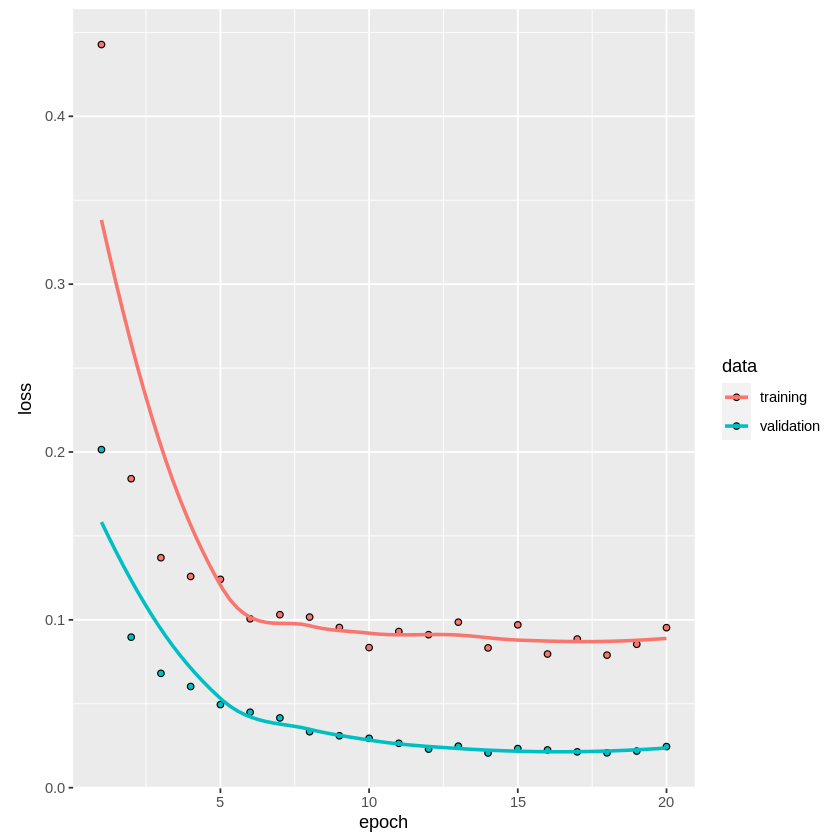

In [63]:
plot(history)
kpred <- predict(model, xrnn[!istrain,, ])

In [64]:
npred <- predict(model, xrnn[!istrain,, ])
1 - sum((kpred - arframe[!istrain, "log_volume"])^2)/sum((mean(arframe[!istrain, "log_volume"]) - arframe[!istrain, "log_volume"])^2)
mean((kpred - arframe[!istrain, "log_volume"])^2)

[1] 0.9818941

[1] 0.02448828

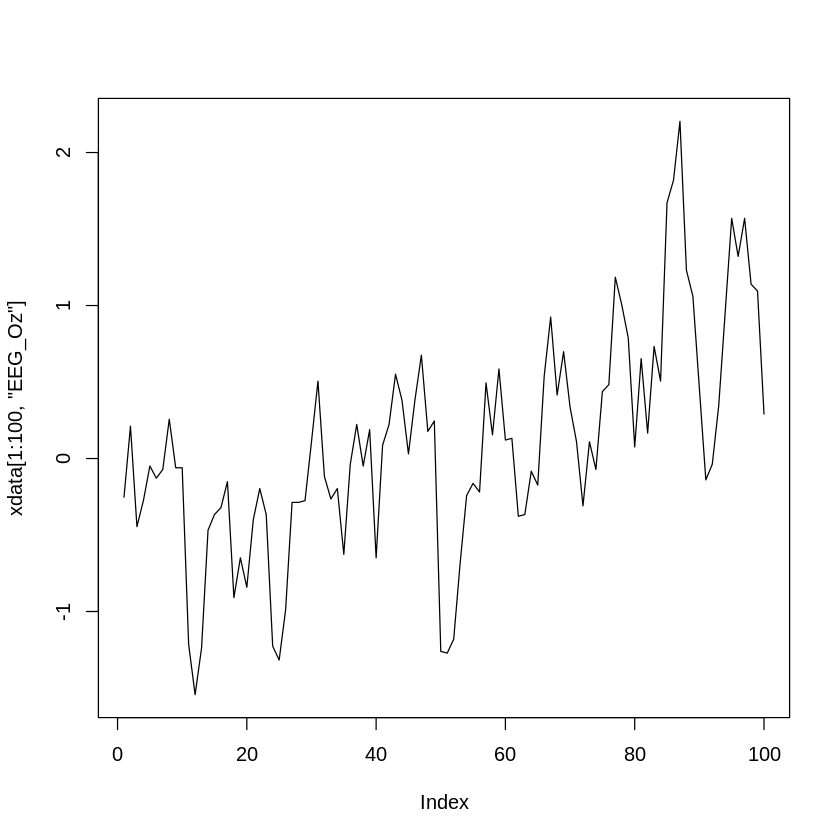

In [65]:
plot(xdata[1:100,'EEG_Oz'], type="l")

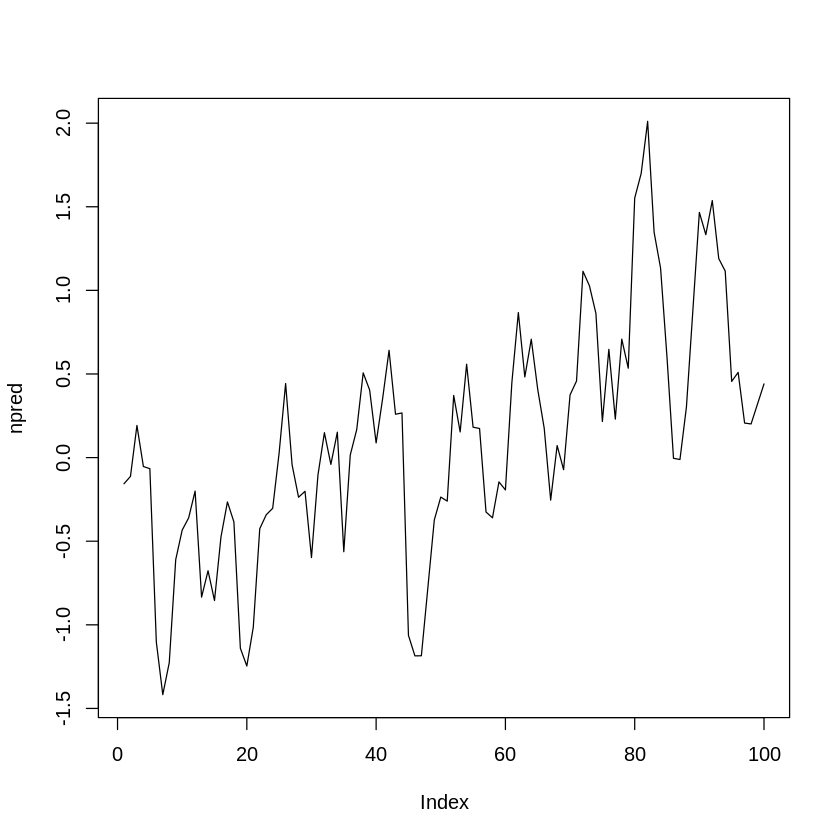

In [66]:
npred <- predict(model, xrnn[1:100,, ])
plot(npred, type="l")

# 10-value repetition

In [13]:
udata = xdata
for(i in 1:10000){
  if(i %% 10 == 1){
    setter = udata[i,2]
  }
  udata[i,2] = setter
}

In [14]:
arframe <- data.frame(log_volume = xdata[, "EEG_Oz"],
   L1 = lagm(udata, 1), L2 = lagm(udata, 2),
   L3 = lagm(udata, 3), L4 = lagm(udata, 4),
   L5 = lagm(udata, 5)
 )
arframe <- arframe[-(1:5), ]
istrain <- istrain[-(1:5)]

In [15]:
arframe

,log_volume,L1.EEG_Cz,L1.EEG_Oz,L1.EOG,L2.EEG_Cz,L2.EEG_Oz,L2.EOG,L3.EEG_Cz,L3.EEG_Oz,L3.EOG,L4.EEG_Cz,L4.EEG_Oz,L4.EOG,L5.EEG_Cz,L5.EEG_Oz,L5.EOG
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,-0.12825678,-0.17061328,-0.2527911,0.0676137153,-0.07915533,-0.2527911,0.0058768364,0.04278860,-0.2527911,0.0881926750,-0.08525253,-0.2527911,0.1550742938,0.16168394,-0.2527911,0.1602190337
7,-0.07165026,-0.24377964,-0.2527911,0.0161663162,-0.17061328,-0.2527911,0.0676137153,-0.07915533,-0.2527911,0.0058768364,0.04278860,-0.2527911,0.0881926750,-0.08525253,-0.2527911,0.1550742938
8,0.25666753,-0.27121703,-0.2527911,-0.0095573833,-0.24377964,-0.2527911,0.0161663162,-0.17061328,-0.2527911,0.0676137153,-0.07915533,-0.2527911,0.0058768364,0.04278860,-0.2527911,0.0881926750
9,-0.06032896,-0.22548805,-0.2527911,-0.0198468632,-0.27121703,-0.2527911,-0.0095573833,-0.24377964,-0.2527911,0.0161663162,-0.17061328,-0.2527911,0.0676137153,-0.07915533,-0.2527911,0.0058768364
10,-0.06032896,-0.12183571,-0.2527911,0.0007320965,-0.22548805,-0.2527911,-0.0198468632,-0.27121703,-0.2527911,-0.0095573833,-0.24377964,-0.2527911,0.0161663162,-0.17061328,-0.2527911,0.0676137153
11,-1.21510191,-0.03342636,-0.2527911,0.0418900158,-0.12183571,-0.2527911,0.0007320965,-0.22548805,-0.2527911,-0.0198468632,-0.27121703,-0.2527911,-0.0095573833,-0.24377964,-0.2527911,0.0161663162
12,-1.54341971,0.07022599,-1.2151019,-0.0352810829,-0.03342636,-0.2527911,0.0418900158,-0.12183571,-0.2527911,0.0007320965,-0.22548805,-0.2527911,-0.0198468632,-0.27121703,-0.2527911,-0.0095573833
13,-1.23774451,0.06412879,-1.2151019,-0.0661495224,0.07022599,-1.2151019,-0.0352810829,-0.03342636,-0.2527911,0.0418900158,-0.12183571,-0.2527911,0.0007320965,-0.22548805,-0.2527911,-0.0198468632
14,-0.46789588,0.05193440,-1.2151019,-0.0867284820,0.06412879,-1.2151019,-0.0661495224,0.07022599,-1.2151019,-0.0352810829,-0.03342636,-0.2527911,0.0418900158,-0.12183571,-0.2527911,0.0007320965


In [16]:
n = nrow(arframe)
xrnn <- data.matrix(arframe[, -2])
xrnn <- array(xrnn, c(n, 3, 5))
xrnn <- xrnn[,, 5:1]
xrnn <- aperm(xrnn, c(1, 3, 2))
dim(xrnn)

[1] 9995    5    3

In [17]:
model <- keras_model_sequential() %>%
   layer_simple_rnn(units = 12,
      input_shape = list(5, 3),
      dropout = 0.1, recurrent_dropout = 0.1) %>%
   layer_dense(units = 1)
model %>% compile(optimizer = optimizer_rmsprop(),
    loss = "mse")
history <- model %>% fit(
    xrnn[istrain,, ], arframe[istrain, "log_volume"],
    batch_size = 100, epochs = 40,
    validation_data =
      list(xrnn[!istrain,, ], arframe[!istrain, "log_volume"])
  )

Loaded Tensorflow version 2.9.2



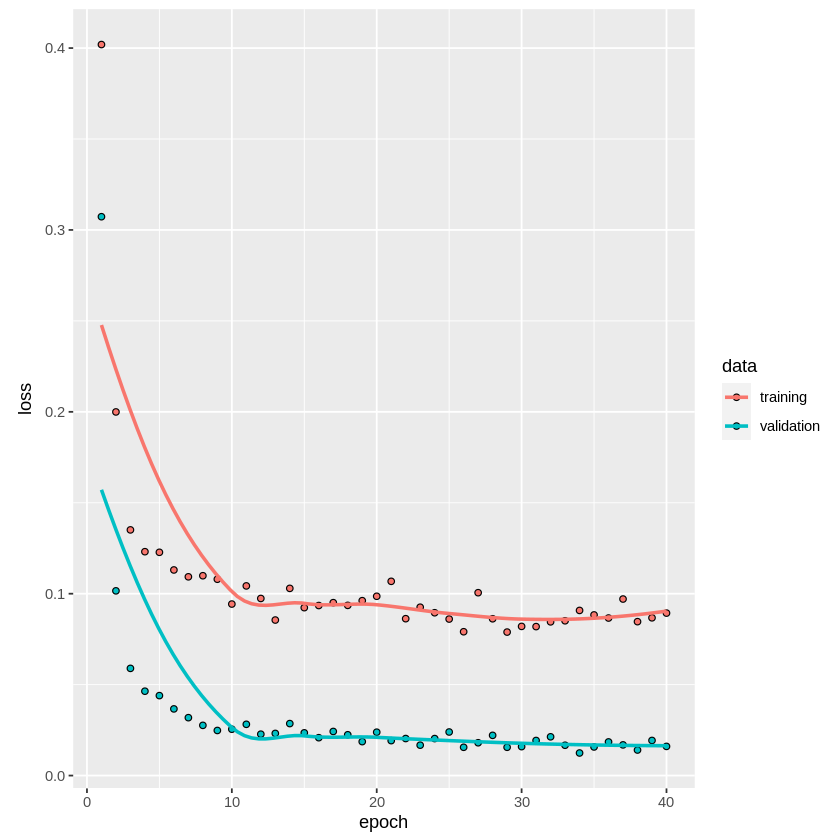

In [18]:
plot(history)
kpred <- predict(model, xrnn[!istrain,, ])

In [19]:
npred <- predict(model, xrnn[!istrain,, ])
1 - sum((kpred - arframe[!istrain, "log_volume"])^2)/sum((mean(arframe[!istrain, "log_volume"]) - arframe[!istrain, "log_volume"])^2)
mean((kpred - arframe[!istrain, "log_volume"])^2)

[1] 0.988143

[1] 0.01603662

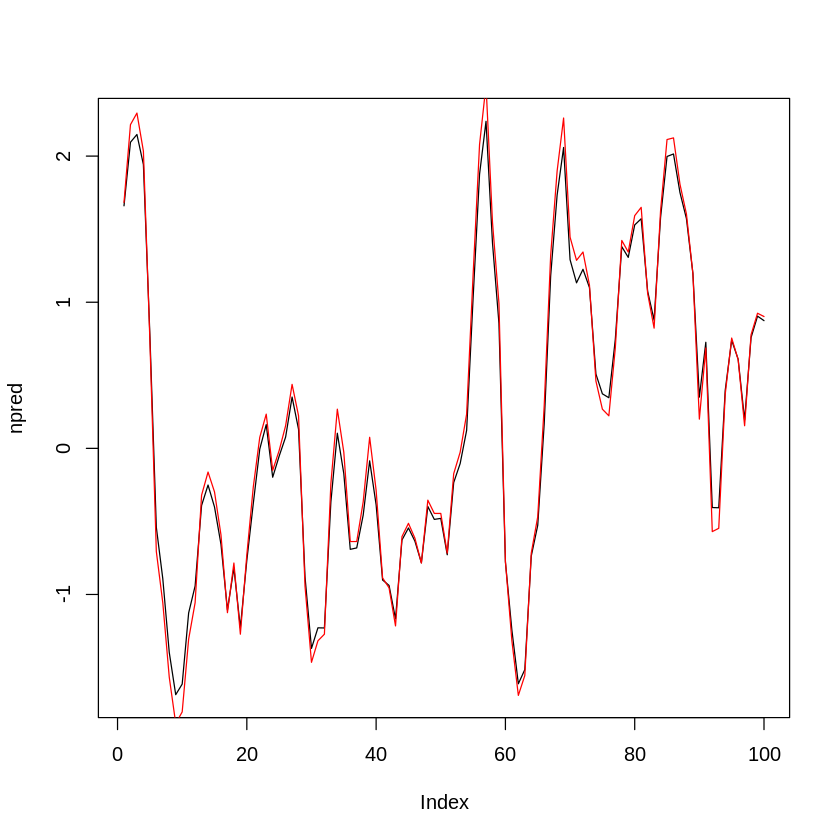

In [20]:
npred <- predict(model, xrnn[9896:9995,, ])
plot(npred, type="l")
lines(xdata[9901:10000,'EEG_Oz'], type="l",col='red')

In [22]:
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
library(ggplot2)

In [68]:
data = cbind(as.vector(seq(from=0,to=10,by=(10/99))),cbind(npred))
data = as.data.frame(cbind(data, xdata[9901:10000,'EEG_Oz']))
colnames(data) = c('time','V1','V2')

In [69]:
data

time,V1,V2
<dbl>,<dbl>,<dbl>
0.0000000,1.659861565,1.68315176
0.1010101,2.094717741,2.21525302
0.2020202,2.147936821,2.29450214
0.3030303,1.942301750,2.03411217
0.4040404,0.779449999,0.74348358
0.5050505,-0.540277004,-0.70564325
0.6060606,-0.891892195,-1.05660366
0.7070707,-1.396717668,-1.56606231
0.8080808,-1.685711145,-1.88305881


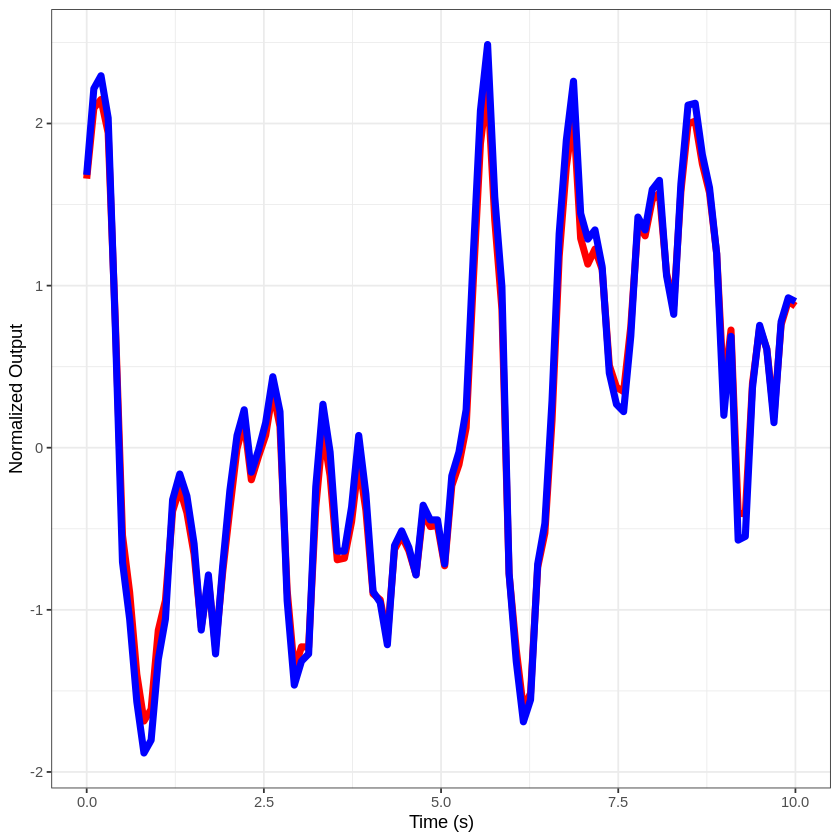

In [91]:
ggplot(data=data, mapping=aes(x=time),) + geom_line(mapping=aes(y=V1), colour='red', size = 2) + geom_line(mapping=aes(y=V2), colour='blue', size = 2) + theme_bw() + xlab("Time (s)") + ylab("Normalized Output")